In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bejaouiyossra","key":"7dd30f18e9c183066ddf5cce17b2ae20"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 97% 518M/534M [00:05<00:00, 118MB/s]
100% 534M/534M [00:05<00:00, 107MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("vegetable-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("vegetable_dataset")

In [ ]:
#filtering step
import cv2
import os
import numpy as np

# Fonction pour vérifier si une image est floue
def is_blurry(image_path, threshold=100):
    # Lecture de l'image en niveau de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Si l'image ne peut pas être lue (par exemple, si elle est corrompue), on renvoie False
    if image is None:
        print(f"Attention : Impossible de charger l'image {image_path}")
        return False  # L'image ne peut pas être traitée, donc elle n'est pas considérée comme floue

    # Calcul de la variance du Laplacien de l'image
    variance = cv2.Laplacian(image, cv2.CV_64F).var()

    # Si la variance est inférieure au seuil, l'image est considérée comme floue
    return variance < threshold  # Si variance < seuil, l'image est floue

# Chemin du dataset contenant les images
dataset_path = "vegetable_dataset/Vegetable Images/train"

# Parcours des dossiers dans le répertoire du dataset
for class_folder in os.listdir(dataset_path):
    # Construction du chemin complet du dossier de la classe (par exemple, 'tomatoes', 'carrots', etc.)
    class_path = os.path.join(dataset_path, class_folder)

    # Vérifie si c'est un répertoire (au cas où il y aurait des fichiers non liés aux images dans ce répertoire)
    if os.path.isdir(class_path):
        # Parcours des fichiers dans le dossier de la classe
        for image_file in os.listdir(class_path):
            # Construction du chemin complet de l'image
            image_path = os.path.join(class_path, image_file)

            # Vérification si le fichier est bien une image (en fonction de l'extension)
            if image_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Vérification si l'image est floue
                if is_blurry(image_path):
                    try:
                        os.remove(image_path)  # Suppression de l'image floue
                        print(f"Image floue supprimée : {image_path}")
                    except Exception as e:
                        # Si une erreur se produit lors de la suppression (ex. : accès refusé), on affiche l'erreur
                        print(f"Erreur lors de la suppression de {image_path} : {e}")



Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0209.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0213.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0582.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0204.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0741.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0244.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0030.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0484.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0420.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0370.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0748.jpg
Image floue supprimée : vegetable_dataset/Vegetable Images/train/Cucumber/0325.jpg
Imag

In [ ]:
#color calibration step
import cv2
import numpy as np
import os

def correct_white_balance(image_path, output_path):
    """
    Applique une correction de balance des blancs sur une image.

    Paramètres :
    - image_path : Chemin de l'image d'entrée.
    - output_path : Chemin de l'image corrigée.

    Retourne :
    - True si l'image a été corrigée et enregistrée, False sinon.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur : Impossible de charger l'image {image_path}")
        return False

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l_eq = cv2.equalizeHist(l)
    lab_corrected = cv2.merge((l_eq, a, b))
    corrected_image = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

    # Vérifier l'écriture du fichier
    if cv2.imwrite(output_path, corrected_image):
        print(f"Image corrigée enregistrée sous : {output_path}")
    else:
        print(f"Erreur lors de l'enregistrement de l'image : {output_path}")
    return True

# Dossier d'entrée et de sortie
input_folder = "vegetable_dataset/Vegetable Images/train/"
output_folder = "vegetable_dataset/Vegetable Images/train/"

# Vérifier si le dossier existe, sinon le créer
if not os.path.exists(input_folder):
    print(f"Erreur : Le dossier {input_folder} n'existe pas.")
else:
    # Parcourir tous les sous-dossiers et fichiers
    for root, dirs, files in os.walk(input_folder):
        for filename in files:
            # Vérifier si c'est une image (JPG, PNG, etc.)
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                input_path = os.path.join(root, filename)

                # Ajouter le suffixe "_wb" avant l'extension de fichier
                name, ext = os.path.splitext(filename)
                output_filename = name + "_wb" + ext
                output_path = os.path.join(output_folder, os.path.relpath(root, input_folder), output_filename)

                # Créer le sous-dossier correspondant si nécessaire
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                # Appliquer la correction de balance des blancs
                correct_white_balance(input_path, output_path)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0617_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0561_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0255_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0746_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0257_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0736_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0358_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0262_wb.jpg
Image corrigée enregistrée sous : vegetable_dataset/Vegetable Images/train/Cauliflower/0303_wb.jpg
Image corrigée enregistrée sous

In [ ]:

#augmentation step (result in train folder)
import cv2
import numpy as np
import os
import random

def adjust_brightness(image, brightness_factor=1.2):
    """Ajuste la luminosité de l'image en multipliant les pixels par un facteur."""
    return np.clip(image * brightness_factor, 0, 255).astype(np.uint8)

def rotate_image(image, angle):
    """Fait tourner l'image d'un angle donné."""
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def augment_image(image):
    """Applique des augmentations aléatoires sur l'image."""
    # Rotation aléatoire entre -30 et 30 degrés
    angle = random.uniform(-30, 30)
    rotated_image = rotate_image(image, angle)

    # Ajustement de la luminosité aléatoire entre 0.8 et 1.5
    brightness_factor = random.uniform(0.8, 1.5)
    bright_image = adjust_brightness(rotated_image, brightness_factor)

    # Redimensionnement aléatoire (par exemple, à 256x256 ou 512x512)
    new_size = random.choice([(256, 256), (512, 512)])
    resized_image = cv2.resize(bright_image, new_size)

    return resized_image

# Dossier contenant les images corrigées (avec balance des blancs)
input_folder = "vegetable_dataset/Vegetable Images/train/"

# Vérifier si le dossier existe
if not os.path.exists(input_folder):
    print(f"Erreur : Le dossier {input_folder} n'existe pas.")
else:
    # Parcourir tous les sous-dossiers et fichiers dans input_folder
    for root, dirs, files in os.walk(input_folder):
        for filename in files:
            # Vérifier si c'est une image corrigée (nom contenant "_wb")
            if "_wb" in filename.lower() and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                input_path = os.path.join(root, filename)

                # Lire l'image
                image = cv2.imread(input_path)
                if image is None:
                    print(f"Erreur : Impossible de charger l'image {input_path}")
                    continue

                # Appliquer l'augmentation
                augmented_image = augment_image(image)

                # Créer le chemin de sortie respectant l'arborescence des sous-dossiers
                output_path = os.path.join(root, filename)  # Enregistrer dans le même sous-dossier

                # Enregistrer l'image augmentée
                cv2.imwrite(output_path, augmented_image)
                print(f"Image augmentée enregistrée sous : {output_path}")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0337_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0939_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0233_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0191_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0797_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0323_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0246_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0672_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train/Papaya/0991_wb.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Imag

KeyboardInterrupt: 

In [ ]:
#augmentation step (result in train_augmented folder)
import cv2
import numpy as np
import os
import random

def adjust_brightness(image, brightness_factor=1.2):
    """Ajuste la luminosité de l'image en multipliant les pixels par un facteur."""
    return np.clip(image * brightness_factor, 0, 255).astype(np.uint8)

def rotate_image(image, angle):
    """Fait tourner l'image d'un angle donné."""
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def augment_image(image):
    """Applique des augmentations aléatoires sur l'image."""
    angle = random.uniform(-30, 30)  # Rotation aléatoire entre -30 et 30°
    rotated_image = rotate_image(image, angle)

    brightness_factor = random.uniform(0.8, 1.5)  # Ajustement de la luminosité
    bright_image = adjust_brightness(rotated_image, brightness_factor)

    new_size = random.choice([(256, 256), (512, 512)])  # Redimensionnement
    resized_image = cv2.resize(bright_image, new_size)

    return resized_image

# Dossiers
input_folder = "vegetable_dataset/Vegetable Images/train/"
output_folder = "vegetable_dataset/Vegetable Images/train_augmented/"

# Vérifier si le dossier d'entrée existe
if not os.path.exists(input_folder):
    print(f"Erreur : Le dossier {input_folder} n'existe pas.")
else:
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Parcourir tous les sous-dossiers et fichiers dans input_folder
    for root, dirs, files in os.walk(input_folder):
        for filename in files:
            # Vérifier si c'est une image corrigée avec "_wb"
            if "_wb" in filename.lower() and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                input_path = os.path.join(root, filename)

                # Lire l'image
                image = cv2.imread(input_path)
                if image is None:
                    print(f"Erreur : Impossible de charger l'image {input_path}")
                    continue

                # Appliquer l'augmentation
                augmented_image = augment_image(image)

                # Créer la structure de dossier de sortie
                relative_path = os.path.relpath(root, input_folder)  # Récupérer le chemin relatif
                save_folder = os.path.join(output_folder, relative_path)  # Chemin complet dans train_augmented

                # Créer le dossier de sortie si inexistant
                os.makedirs(save_folder, exist_ok=True)

                # Nom du fichier de sortie
                output_path = os.path.join(save_folder, filename.replace("_wb", "_aug"))

                # Enregistrer l'image augmentée
                cv2.imwrite(output_path, augmented_image)
                print(f"Image augmentée enregistrée sous : {output_path}")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/0377_aug.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/0997_aug.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/0318_aug.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/1045_aug.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/0391_aug.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/0357_aug.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/0881_aug.jpg
Image augmentée enregistrée sous : vegetable_dataset/Vegetable Images/train_augmented/Cauliflower/0414_aug.jpg
Image augmentée enregistrée sous :

In [ ]:
#Model Building
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# Charger le modèle ResNet50 pré-entrainé sans la couche de classification (include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Gel des couches de base, car nous ne voulons pas les ré-entrainer
base_model.trainable = False

# Construire le modèle en ajoutant des couches personnalisées
model = models.Sequential([
    base_model,  # Utilisation de la base pré-entrainée
    layers.GlobalAveragePooling2D(),  # Moyenne des caractéristiques extraites
    layers.Dense(1024, activation='relu'),  # Couche dense avec activation ReLU
    layers.Dropout(0.5),  # Dropout pour éviter le sur-apprentissage
    layers.Dense(15, activation='softmax')  # Couche finale avec 15 neurones pour 15 classes (softmax)
])

# Afficher le résumé du modèle
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │          15,375 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,701,263 (98.04 MB)

 Trainable params: 2,113,551 (8.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
#start the train with a class (Tomato)
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définition des hyperparamètres
learning_rate = 0.001
batch_size = 32
epochs = 2

# Création des générateurs d'images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des images en ne prenant que la classe "Tomato"
train_generator = train_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/train_augmented/',  # Chemin du dataset
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',  # Utilisation de 'binary' car une seule classe
    classes=['Tomato']  # On ne charge que le dossier "Tomato"
)

validation_generator = validation_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/validation/',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    classes=['Tomato']
)

# Définition du modèle (remplace par ton modèle)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 sortie pour binaire (Tomato ou non)
])

# Compilation du modèle
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',  # Perte pour classification binaire
    metrics=['accuracy']
)

# Définition des callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[reduce_lr, early_stopping]
)


Found 938 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Epoch 1/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.9063 - loss: 0.0951 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010


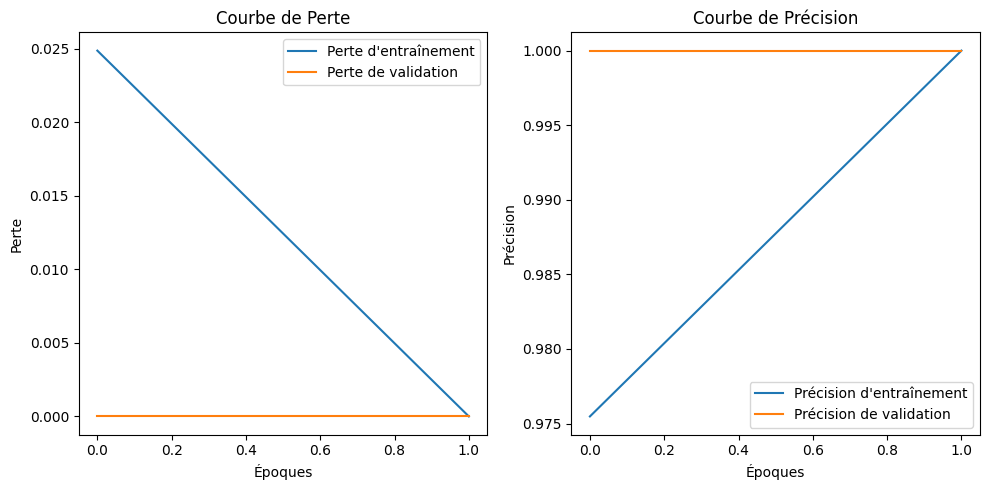

In [ ]:
#visualisation of the result

import matplotlib.pyplot as plt

# Récupérer les données de perte et de précision
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

# Tracer la courbe de perte
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Perte d\'entraînement')
plt.plot(val_loss_values, label='Perte de validation')
plt.title('Courbe de Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Tracer la courbe de précision
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Précision d\'entraînement')
plt.plot(val_accuracy_values, label='Précision de validation')
plt.title('Courbe de Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()


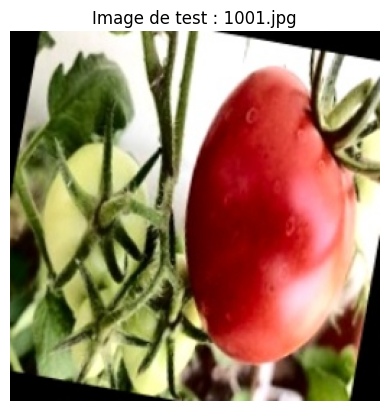

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
L'image est une tomate !


In [ ]:
#test step
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Chemin vers l'image de test
img_path = 'vegetable_dataset/Vegetable Images/train_augmented/Tomato/0002_wb.jpg'  # Remplace par ton chemin réel vers l'image

# Charger l'image et la redimensionner à la taille attendue par ton modèle (256x256)
img = image.load_img(img_path, target_size=(256, 256))

# Afficher l'image pour la visualiser
plt.imshow(img)
plt.title('Image de test : 1001.jpg')
plt.axis('off')  # Désactiver les axes pour mieux voir l'image
plt.show()

# Convertir l'image en tableau numpy
img_array = image.img_to_array(img)

# Ajouter une dimension pour le batch (le modèle attend un batch d'images)
img_array = np.expand_dims(img_array, axis=0)

# Normaliser l'image (mettre à l'échelle les pixels entre 0 et 1)
img_array = img_array / 255.0

# Faire une prédiction
predictions = model.predict(img_array)



# Afficher le résultat de la prédiction
if predictions[0] > 0.5:  # Si la probabilité est supérieure à 0.5, c'est une tomate
    print("L'image est une tomate !")
else:
    print("L'image n'est pas une tomate.")


In [ ]:
!apt-get install exiftool

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libsombok3 libunicode-linebreak-perl
Suggested packages:
  libposix-strptime-perl libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl libsombok3
  libunicode-linebreak-perl
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 3,964 kB of archives.
After this operation, 23.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-zip-perl all 1.68-1 [90.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libimage-exiftool-perl all 12.40+dfsg-1 [3,717 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmime-charset-perl all 1.012.2-1

In [ ]:
!exiftool "vegetable_dataset/Vegetable Images/train_augmented/"


    1 directories scanned
    0 image files read


In [ ]:
#use exiftool
import os
import subprocess

dataset_path = "vegetable_dataset/Vegetable Images/train_augmented/"
resolution_target = (256, 256)  # Résolution souhaitée (largeur, hauteur)

def get_image_resolution(image_path):
    """Utilise ExifTool pour récupérer la résolution d'une image."""
    try:
        output = subprocess.check_output(["exiftool", image_path]).decode("utf-8")
        width = height = None
        for line in output.split("\n"):
            if "Image Width" in line:
                width = int(line.split(":")[-1].strip())
            if "Image Height" in line:
                height = int(line.split(":")[-1].strip())
        return (width, height) if width and height else None
    except Exception as e:
        print(f"Erreur avec {image_path}: {e}")
        return None

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        resolution = get_image_resolution(image_path)
        if resolution and resolution != resolution_target:
            print(f"Suppression : {image_path} (résolution {resolution})")
            os.remove(image_path)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0351_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0107_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0682_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0416_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0449_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0384_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0905_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable Images/train_augmented/Pumpkin/0811_aug.jpg (résolution (512, 512))
Suppression : vegetable_dataset/Vegetable 

In [ ]:
#train (i tried the train many times in order to have the best result)
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définir une fonction de compilation avec un optimiseur variable et un learning rate
def compile_model(learning_rate=0.001, optimizer='adam'):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'adamw':
        opt = tf.keras.optimizers.AdamW(learning_rate=learning_rate)

    # Compiler le modèle
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',  # Classification multi-classes
        metrics=['accuracy']
    )

# Exemple de configuration d'apprentissage avec AdamW et learning rate différent
learning_rates = [0.0001, 0.001, 0.01]  # Différents taux d'apprentissage
optimizers = ['adam', 'adamw']  # Optimiseurs à tester

# Paramètres pour l'entraînement
epochs = 10
batch_size = 32  # Taille de lot

# Créer un callback pour réduire le taux d'apprentissage si la validation ne s'améliore pas
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Définir l'ImageDataGenerator pour l'entraînement et la validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Créer les générateurs pour les données d'entraînement et de validation
train_generator = train_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/train_augmented',  # Remplacez par le chemin réel
    target_size=(256, 256),  # Taille des images
    batch_size=batch_size,
    class_mode='categorical'  # Pour la classification multi-classes
)

validation_generator = validation_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/validation',  # Remplacez par le chemin réel
    target_size=(256, 256),  # Taille des images
    batch_size=batch_size,
    class_mode='categorical'  # Pour la classification multi-classes
)

# Définir le modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')  # 15 classes, activation softmax
])

# Entraînement pour chaque combinaison d'optimiseur et de learning rate
for optimizer in optimizers:
    for lr in learning_rates:
        print(f"Entraînement avec {optimizer} et learning rate {lr}")

        # Recompiler le modèle avec les nouveaux paramètres
        compile_model(learning_rate=lr, optimizer=optimizer)

        # Entraînement du modèle
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[reduce_lr, early_stopping]
        )

        # Affichage de la performance sur le jeu de validation
        val_accuracy = history.history['val_accuracy'][-1]
        val_loss = history.history['val_loss'][-1]
        print(f"Optimiseur: {optimizer}, Learning Rate: {lr} -> Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}")


Found 7065 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entraînement avec adam et learning rate 0.0001
Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 957s 4s/step - accuracy: 0.2006 - loss: 2.5377 - val_accuracy: 0.4547 - val_loss: 1.7995 - learning_rate: 1.0000e-04
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 952s 4s/step - accuracy: 0.5191 - loss: 1.5359 - val_accuracy: 0.5440 - val_loss: 1.4505 - learning_rate: 1.0000e-04
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 987s 4s/step - accuracy: 0.6685 - loss: 1.0919 - val_accuracy: 0.5893 - val_loss: 1.3173 - learning_rate: 1.0000e-04
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 944s 4s/step - accuracy: 0.7492 - loss: 0.8462 - val_accuracy: 0.6317 - val_loss: 1.1497 - learning_rate: 1.0000e-04
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 947s 4s/step - accuracy: 0.8116 - loss: 0.6685 - val_accuracy: 0.6290 - val_loss: 1.1469 - learning_rate: 1.0000e-04
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 941s 4s/step - accuracy: 0.8562 - loss: 0.5451 - val_accuracy: 0.6613 - val_loss: 1.0871 - learning_rate: 1.0000e-04
Epoch 7/10


In [ ]:
#repetition 4 fois
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paramètres optimisés
learning_rates = [0.0005, 0.001]  # Valeurs réalistes de learning rate
optimizers = {'adam': Adam, 'adamw': AdamW}  # Optimiseurs disponibles
epochs = 10
batch_size = 32

# Callbacks pour optimiser l'entraînement
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Prétraitement des images avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des datasets
train_generator = train_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/train_augmented',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/validation',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

# Fonction pour créer et compiler le modèle
def create_model(learning_rate, optimizer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(15, activation='softmax')  # 15 classes
    ])

    model.compile(
        optimizer=optimizer(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Stocker les meilleurs résultats
best_results = {'optimizer': None, 'learning_rate': None, 'val_accuracy': 0}

# Entraînement optimisé
for opt_name, opt_class in optimizers.items():
    for lr in learning_rates:
        print(f"🟢 Entraînement avec {opt_name} et learning rate {lr}")

        # Créer un nouveau modèle pour chaque configuration
        model = create_model(lr, opt_class)

        # Entraîner le modèle
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[reduce_lr, early_stopping],
            verbose=1
        )

        # Récupérer la meilleure accuracy de validation
        val_accuracy = max(history.history['val_accuracy'])

        # Sauvegarde du meilleur modèle
        if val_accuracy > best_results['val_accuracy']:
            best_results = {'optimizer': opt_name, 'learning_rate': lr, 'val_accuracy': val_accuracy}

# Afficher le meilleur résultat
print(f"🏆 Meilleure configuration: {best_results}")


In [ ]:
#1 fois
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paramètres
learning_rate = 0.001  # Choisir un seul learning rate
optimizer = 'adam'  # Choisir un seul optimiseur

# Définir le modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')  # 15 classes
])

# Choix de l'optimiseur
if optimizer == 'adam':
    opt = Adam(learning_rate=learning_rate)
elif optimizer == 'adamw':
    opt = tf.keras.optimizers.AdamW(learning_rate=learning_rate)

# Compiler le modèle
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Préparer les données
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/train_augmented',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/validation',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Entraînement (1 seule fois)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[reduce_lr, early_stopping]
)

# Résultats finaux
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"Optimiseur: {optimizer}, Learning Rate: {learning_rate} -> Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 7034 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 523s 2s/step - accuracy: 0.1638 - loss: 4.3725 - val_accuracy: 0.5150 - val_loss: 1.4914 - learning_rate: 0.0010
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 520s 2s/step - accuracy: 0.5693 - loss: 1.3231 - val_accuracy: 0.5923 - val_loss: 1.2551 - learning_rate: 0.0010
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 521s 2s/step - accuracy: 0.7877 - loss: 0.6688 - val_accuracy: 0.6290 - val_loss: 1.1892 - learning_rate: 0.0010
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.9309 - loss: 0.2474 - val_accuracy: 0.6847 - val_loss: 1.1160 - learning_rate: 0.0010
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.9883 - loss: 0.0537 - val_accuracy: 0.6730 - val_loss: 1.3176 - learning_rate: 0.0010
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 0.9944 - loss: 0.0316 - val_accuracy: 0.7240 - val_loss: 1.1533 - learning_rate: 0.0010
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 1.0000 - loss: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définir une fonction de compilation avec un optimiseur dynamique et un learning rate
def compile_model(learning_rate=0.001, optimizer='adam'):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)

    # Compiler le modèle
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',  # Classification multi-classes
        metrics=['accuracy']
    )

# Paramètres d'entraînement
epochs = 50  # Nombre d'époques
batch_size = 32  # Taille de lot

# Créer un callback pour réduire le taux d'apprentissage si la validation ne s'améliore pas
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Surveiller la perte de validation
    factor=0.5,  # Divise le taux d'apprentissage par 2
    patience=3,  # Attendre 3 époques sans amélioration avant de réduire le LR
    min_lr=0.00001  # Ne pas descendre en dessous de ce taux d'apprentissage
)

# Early stopping pour arrêter l'entraînement lorsque la validation n'améliore plus
early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveiller la perte de validation
    patience=5,  # Attendre jusqu'à 5 époques sans amélioration avant d'arrêter
    restore_best_weights=True  # Restaurer les meilleurs poids au cas où l'entraînement s'arrêterait trop tôt
)

# Préparer les générateurs de données
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/train_augmented',  # Le chemin de ton dossier d'images augmentées
    target_size=(256, 256),  # Taille des images
    batch_size=batch_size,
    class_mode='categorical'  # Pour classification multi-classes
)

validation_generator = validation_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/validation',  # Dossier de validation
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

# Définir le modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')  # 15 classes
])

# Compiler le modèle avec un optimiseur et un learning rate adaptés
compile_model(learning_rate=0.001, optimizer='adam')

# Entraînement du modèle
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[reduce_lr, early_stopping]  # Utilisation de callbacks
)

# Affichage de la performance finale
print("Training terminé.")
print(f"Meilleur accuracy de validation : {max(history.history['val_accuracy'])}")
print(f"Meilleure perte de validation : {min(history.history['val_loss'])}")


Found 7034 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 512s 2s/step - accuracy: 0.2134 - loss: 3.2062 - val_accuracy: 0.5320 - val_loss: 1.4735 - learning_rate: 0.0010
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - accuracy: 0.6499 - loss: 1.0977 - val_accuracy: 0.5853 - val_loss: 1.2699 - learning_rate: 0.0010
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 0.8741 - loss: 0.4310 - val_accuracy: 0.6190 - val_loss: 1.2673 - learning_rate: 0.0010
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.9700 - loss: 0.1251 - val_accuracy: 0.6127 - val_loss: 1.4350 - learning_rate: 0.0010
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.9951 - loss: 0.0317 - val_accuracy: 0.6363 - val_loss: 1.4695 - learning_rate: 0.0010
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.9992 - loss: 0.0091 - val_accuracy: 0.6017 - val_loss: 1.7660 - learning_rate: 0.0

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Définir l'augmentation des données avec ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Création des générateurs pour l'entraînement et la validation
train_generator = train_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/train_augmented',  # Répertoire des données d'entraînement
    target_size=(256, 256),  # Taille des images
    batch_size=32,
    class_mode='categorical'  # Classification multi-classes
)

validation_generator = validation_datagen.flow_from_directory(
    'vegetable_dataset/Vegetable Images/validation',  # Répertoire des données de validation
    target_size=(256, 256),  # Taille des images
    batch_size=32,
    class_mode='categorical'  # Classification multi-classes
)

# Charger le modèle ResNet50 pré-entrainé sans la couche de classification
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Gel des couches de base
base_model.trainable = False

# Ajouter des couches personnalisées au modèle
model = models.Sequential([
    base_model,  # Utilisation du modèle ResNet50 pré-entrainé
    layers.GlobalAveragePooling2D(),  # Moyenne des caractéristiques extraites
    layers.Dense(1024, activation='relu'),  # Couche dense avec activation ReLU
    layers.Dropout(0.5),  # Dropout pour éviter le sur-apprentissage
    layers.Dense(15, activation='softmax')  # Couche finale pour 15 classes avec activation softmax
])

# Débloquer quelques couches de ResNet50 pour fine-tuning
for layer in base_model.layers[-10:]:  # Déverrouiller les 10 dernières couches
    layer.trainable = True

# Compiler le modèle avec un optimiseur Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Classification multi-classes
    metrics=['accuracy']
)

# Définir les callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping]
)

# Sauvegarder le modèle entraîné
model.save('vegetable_classifier.h5')

# Afficher les courbes de performance (optionnel)
import matplotlib.pyplot as plt

# Affichage de la précision et de la perte
plt.plot(history.history['accuracy'], label='Précision d\'entrainement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend(loc='lower right')
plt.title('Courbe de précision')
plt.show()

plt.plot(history.history['loss'], label='Perte d\'entrainement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend(loc='upper right')
plt.title('Courbe de perte')
plt.show()


Found 14010 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 4315s 10s/step - accuracy: 0.1840 - loss: 2.4730 - val_accuracy: 0.0943 - val_loss: 6.6384 - learning_rate: 0.0010
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 4196s 10s/step - accuracy: 0.3482 - loss: 1.9333 - val_accuracy: 0.0843 - val_loss: 7.2443 - learning_rate: 0.0010
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 4193s 10s/step - accuracy: 0.4154 - loss: 1.7388 - val_accuracy: 0.1933 - val_loss: 4.7622 - learning_rate: 0.0010
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 4152s 9s/step - accuracy: 0.4470 - loss: 1.6460 - val_accuracy: 0.2387 - val_loss: 3.4489 - learning_rate: 0.0010
Epoch 5/20
420/438 ━━━━━━━━━━━━━━━━━━━━ 2:26 8s/step - accuracy: 0.4906 - loss: 1.5345

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-03fdfe9723d2>", line 70, in <cell line: 0>
    history = model.fit(
              ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in erro

TypeError: object of type 'NoneType' has no len()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Lister le contenu de Mon Drive
!ls "/content/drive/My Drive/"


Mounted at /content/drive
'1. architecture linux.txt'
'1st task.ipynb'
 20221128_094025.jpg
 20221128_094025-removebg-preview.png
 416679402_2884596935015146_8486259793486890509_n.jpg
'Colab Notebooks'
'Copie de Untitled1.ipynb'
 CSF_Doc_Prep_Architecture_des_microcontrolleurs.pdf.gdrive
'CSF_Document_de_reference_langage C v2 - Google Drive - Google Chrome 2024-08-20 17-37-50.mp4'
 CSF_Langage_C_1V2.pdf.gdrive
 CSF-RCP_STM32_RCP6.1.pdf.gdrive
'cv final (1) (1).pdf'
'cv_Yosra_Bejaoui (1).pdf'
 cv_Yosra_Bejaoui2.pdf
'cv_Yosra_Bejaouii (1).pdf'
 cv_Yosra_Bejaouii.pdf
 cv-yosra-bejaoui.pdf
 cv_Yosra_Bejaoui.pdf
 enim.jpg
 enz.jpg
'explication_pfe_ST (1).docx'
 explication_pfe_ST.docx
'Introduction génèrale.docx'
'My dataset'
 OP_KRH.v1i.yolov8
 Presentation_Ameni_BELHADJ_final_avant.pptx
 Presentation_Ameni_BELHADJ_final_m.pptx
'robot instrumentiste.docx'
'robotique chap 3 (1).pdf'
'robotique chap 3.pdf'
 Training_ENIM_2024.gdoc
 Training_ENIM_2024.pdf
 train-yolov8-object-detector-goog

In [2]:
!git clone https://github.com/MohamedTaherOthmen/Graines-internship-reseach-2025.git


Cloning into 'Graines-internship-reseach-2025'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 69 (delta 7), reused 25 (delta 1), pack-reused 14 (from 1)
Receiving objects: 100% (69/69), 99.53 MiB | 26.79 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (43/43), done.
